# Network Notes

In [458]:
# good 160 unit *3 network
network_model = "func-20-5-1"
iter1 = 260
iter2 = 430
codec = 3200
model_type = 'functional'
'''
network_model = "tale-prog-large3dense5"
iter1 = 5
iter2 = 50

network_model = "tale-prog-large3dense6"
iter1 = 5
iter2 = 30

network_model = "tale-prog-large3alt1"
iter1 = 5 #good
iter2 = 110

network_model = "tale-prog-quick2"
iter1 = 55
iter2 = 340
'''
# full set of 320 unit *3 network
#network_model = "tale-prog-stateful8l"
#iter1 = 500
#iter2 = 505

#network_model = "tale-prog-lg123alt"
#iter1 = 5
#iter2 = 55

from subprocess import check_output, call

import os
import json

home = os.environ.get('HOME')
if codec==3200:
    codec_sub = '-3200'
else:
    codec_sub = ''

os.chdir(home + "/store/c2gen/notebooks")


cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
nh = home + "/store/c2gen/out/"+network_model+"/log"
    
if os.path.isfile(nh):
  with open(nh) as f:
      res = f.readlines()
      print(str.join("",res[-12:]))

  try:
    res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup/"+network_model+".out"])
  except:
    try:
      res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup-"+network_model+".out"])
    except:
      res = ''
  if res != '':  
    res = str(res).replace('\\n', "\n")
    res = str(res).replace('\\r', "\n")
    res = str(res).replace('\\x08', "")
    res = res.split("\n")[-1]
    print(res)



Generated multiple frames in one action: 1 
Generated multiple frames in one action: 1 
Generated multiple frames in one action: 1 
Generated multiple frames in one action: 1 
Generated multiple frames in one action: 1 
Generated multiple frames in one action: 1 
wrote frames:  200 
saving config 
Training Iteration 51 
using full set of frames 
Training Iteration 52 
using full set of frames 

 6000/48451 [==>...........................] - ETA: 736s - loss: 2.5219 - main_output_loss: 2.0628 - mid_output_loss: 2.2953'


In [459]:
with open(home + "/store/c2gen/out/"+network_model+"/config.json") as f:
    j = json.load(f)
    for k,v in j.items():
        print(k,": ",v) 


start_iteration :  50
num_iterations :  1200
fit_batch_size :  100
learn_next_step :  True
gen_every_nth :  10
save_model_every_nth :  10
framelen :  13
frame_seq_len :  100
seed_seq_len :  100
seq_step :  100
test_data_fn :  ./test/criticalpracticalreason.c2-3200
frame_prop_loss_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
stateful :  False
shuffle :  False
limit_frames :  0
optimizer :  {'name': 'Nadam', 'params': {}}
generate_len :  200
model_filename :  out/func-20-5-1/model-50.h5
frame_len_ms :  20


In [460]:
try:
  with open(home + "/store/c2gen/out/" + network_model + '/notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

# func-20-5-1 Notes

2017-11-16 20:53:42

Run with arguments ./test/criticalpracticalreason.c2-3200 none

## Description



In [461]:
if model_type != 'functional':
  nd.model_config(network_model)

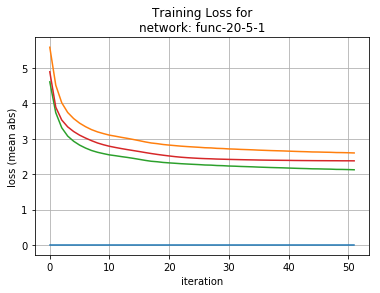

In [462]:
nd.plot_training_loss(network_model, 'mean abs') 

In [463]:
with open(home + "/store/c2gen/out/"+network_model+"/training.log") as f:
    print(str.join("",f.readlines()[-10:]))

with open(home + "/store/c2gen/out/"+network_model+"/iteration_counter") as f:
    latest_iter = (int(f.readlines()[0]))
    print(latest_iter)
    

0,2.63675313081,2.16006247089,2.38345326405
0,2.63232835975,2.15591111112,2.38208620768
0,2.62575216952,2.1495899847,2.38081088862
0,2.62376452055,2.14787456026,2.37944976598
0,2.61900561543,2.14321851801,2.37893545161
0,2.61575999907,2.1401928102,2.3778359089
0,2.60916068439,2.13366111865,2.37749779326
0,2.6073222822,2.13214543375,2.37588420683
0,2.60319483978,2.12801397571,2.37590428496
0,2.59763407037,2.12269933579,2.37467363751

50


Latest Iteration: 50
3200 rate codec



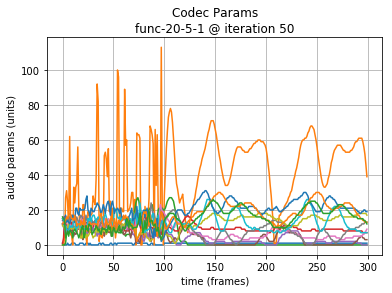

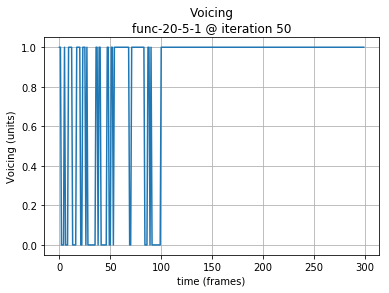

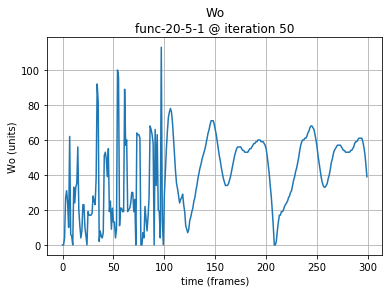

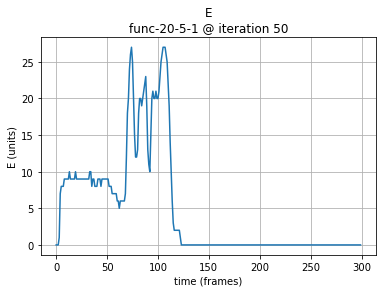

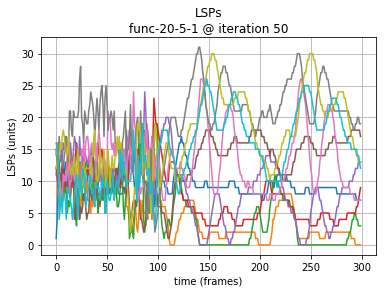

In [464]:
try:
  print("Latest Iteration:", latest_iter)
  nd.plot_codec_params(network_model,latest_iter, scale_up='orig')
  nd.plot_spec_params(network_model,latest_iter, params='Voicing')
  nd.plot_spec_params(network_model,latest_iter, params='Wo')
  nd.plot_spec_params(network_model,latest_iter, params='E')
  nd.plot_spec_params(network_model,latest_iter, params='LSPs')
except FileNotFoundError:
    print("File not found")

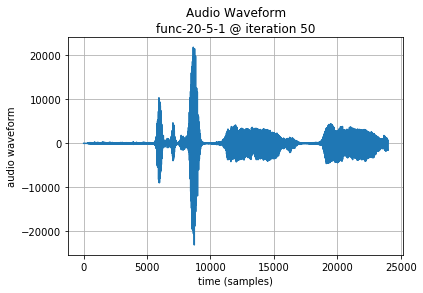

In [465]:
#print(latest_iter)
#print(home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(latest_iter)+codec_sub+".wav")
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(latest_iter)
#print(home + "/store/c2gen/c2towav.sh", cb)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, latest_iter)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(latest_iter)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

Early Iterations
===

In [466]:
nd.plot_codec_params(network_model,iter1, scale_up='orig')
nd.plot_spec_params(network_model,iter1, params='Voicing')
nd.plot_spec_params(network_model,iter1, params='Wo')
nd.plot_spec_params(network_model,iter1, params='E')
nd.plot_spec_params(network_model,iter1, params='LSPs')

FileNotFoundError: [Errno 2] No such file or directory: '/home/phil/store/c2gen/out/func-20-5-1/out-c2cb-260'

In [ ]:
nd.plot_audio_waveform(network_model, iter1)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)+codec_sub+".wav"))

Later Iterations
===

In [ ]:
nd.plot_codec_params(network_model,iter2, scale_up=True)
nd.plot_spec_params(network_model,iter2, params='Voicing')
nd.plot_spec_params(network_model,iter2, params='Wo')
nd.plot_spec_params(network_model,iter2, params='E')
nd.plot_spec_params(network_model,iter2, params='LSPs')

In [ ]:
nd.plot_audio_waveform(network_model, iter2)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)+codec_sub+".wav"))